# Reward design and testing

In [7]:
# Import relevant libraries

%load_ext autoreload
%autoreload 2

from flatland.envs.line_generators import SparseLineGen
from flatland.envs.malfunction_generators import (
    MalfunctionParameters,
    ParamMalfunctionGen,
)
from flatland.envs.persistence import RailEnvPersister
from flatland.envs.rail_env import RailEnv
from flatland.envs.rail_generators import SparseRailGen
from flatland.envs.observations import GlobalObsForRailEnv

from flatland.envs.observations import TreeObsForRailEnv
from flatland.envs.distance_map import DistanceMap
import flatland.envs.rail_env_shortest_paths as sp

import torch
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import test_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reward design

In [ ]:
# Must modify two functions in env
env.

## Testing

In [2]:
# Create the environment

env = RailEnv(
    width=20,
    height=15,
    rail_generator=SparseRailGen(
        seed=0,  # Random seed
        max_num_cities=2,  # Number of cities
        grid_mode=True,
        max_rails_between_cities=2,
        max_rail_pairs_in_city=1,
    ),
    line_generator=SparseLineGen(speed_ratio_map={1.: 1.}
        ),
    number_of_agents=2, # Only one agent
    obs_builder_object=GlobalObsForRailEnv(),
    malfunction_generator=ParamMalfunctionGen(
        MalfunctionParameters(
            malfunction_rate=0.,  # Rate of malfunction
            min_duration=3,  # Minimal duration
            max_duration=20,  # Max duration
        )
    ),
)

# Example Render

c:\Users\pauli\anaconda3\envs\flatland-marl\lib\site-packages\flatland\utils\rendertools.py:399: UserWarning: Predictor did not provide any predicted cells to render.                 Observation builder needs to populate: env.dev_obs_dict
  Observation builder needs to populate: env.dev_obs_dict")


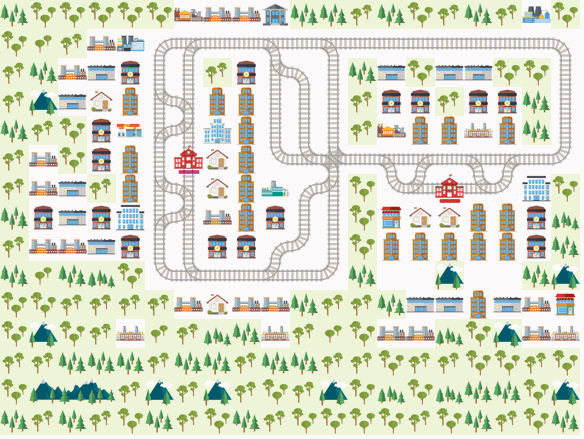

In [8]:
# Step loop with video rendering, shortest path policy

obs, info = env.reset()
env_renderer = test_utils.RenderWrapper(env, real_time_render=False, force_gif=True)
env_renderer.render()

while True:
    actions = {}
    for handle in env.get_agent_handles():
        actions[handle] = 2
    obs, all_rewards, done, _ = env.step(actions)
    env_renderer.render()
    if done['__all__']:
        break

env_renderer.make_gif('test.gif')